# Hybrid Multi-Agent AI for Fair and Transparent Churn Prediction
This notebook covers the end-to-end preprocessing and feature engineering steps for the project "Fair and Transparent Churn Prediction: A Hybrid Multi-Agent AI Approach for Bias Reduction, Explainability, and Ethical Financial Decision-Making".

## Step 1: Data Understanding and Preprocessing

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#Loading the dataset
file_path = "D:\Bank_Churn_Thesis\loan_data_set.csv"
loan_data = pd.read_csv(file_path)

#Printing the basic information for understanding
loan_data_info = loan_data.info()
loan_data_head = loan_data.head()
loan_data_info, loan_data_head 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


(None,
     Loan_ID Gender Married Dependents     Education Self_Employed  \
 0  LP001002   Male      No          0      Graduate            No   
 1  LP001003   Male     Yes          1      Graduate            No   
 2  LP001005   Male     Yes          0      Graduate           Yes   
 3  LP001006   Male     Yes          0  Not Graduate            No   
 4  LP001008   Male      No          0      Graduate            No   
 
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 0             5849                0.0         NaN             360.0   
 1             4583             1508.0       128.0             360.0   
 2             3000                0.0        66.0             360.0   
 3             2583             2358.0       120.0             360.0   
 4             6000                0.0       141.0             360.0   
 
    Credit_History Property_Area Loan_Status  
 0             1.0         Urban           Y  
 1             1.0         Rural           

In [7]:
# Handling Missing Values
loan_data.fillna({
    'Gender': loan_data['Gender'].mode()[0],
    'Married': loan_data['Married'].mode()[0],
    'Dependents': loan_data['Dependents'].mode()[0],
    'Self_Employed': loan_data['Self_Employed'].mode()[0],
    'Loan_Amount_Term': loan_data['Loan_Amount_Term'].mode()[0],
    'LoanAmount': loan_data['LoanAmount'].median(),
    'Credit_History': loan_data['Credit_History'].median()
}, inplace=True)
    

## Step 2: Encoding Categorical Features

In [8]:
# Label Encoding for binary categories
le = LabelEncoder()
loan_data['Gender'] = le.fit_transform(loan_data['Gender'])
loan_data['Married'] = le.fit_transform(loan_data['Married'])
loan_data['Education'] = le.fit_transform(loan_data['Education'])
loan_data['Self_Employed'] = le.fit_transform(loan_data['Self_Employed'])
loan_data['Loan_Status'] = le.fit_transform(loan_data['Loan_Status'])

# One-Hot Encoding for multi-category features
loan_data = pd.get_dummies(loan_data, columns=['Dependents', 'Property_Area'], drop_first=True)

# Drop the Loan_ID as it's not useful for modeling
loan_data.drop(columns=['Loan_ID'], inplace=True)
    

## Step 3: Feature Engineering

In [9]:
loan_data['Total_Income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
loan_data['Income_to_Loan_Ratio'] = loan_data['Total_Income'] / loan_data['LoanAmount']
loan_data['EMI'] = (loan_data['LoanAmount'] * 1000) / loan_data['Loan_Amount_Term']
loan_data['Loan_Income_Percentage'] = loan_data['EMI'] / loan_data['Total_Income']

## Step 4: Outlier Detection and Handling

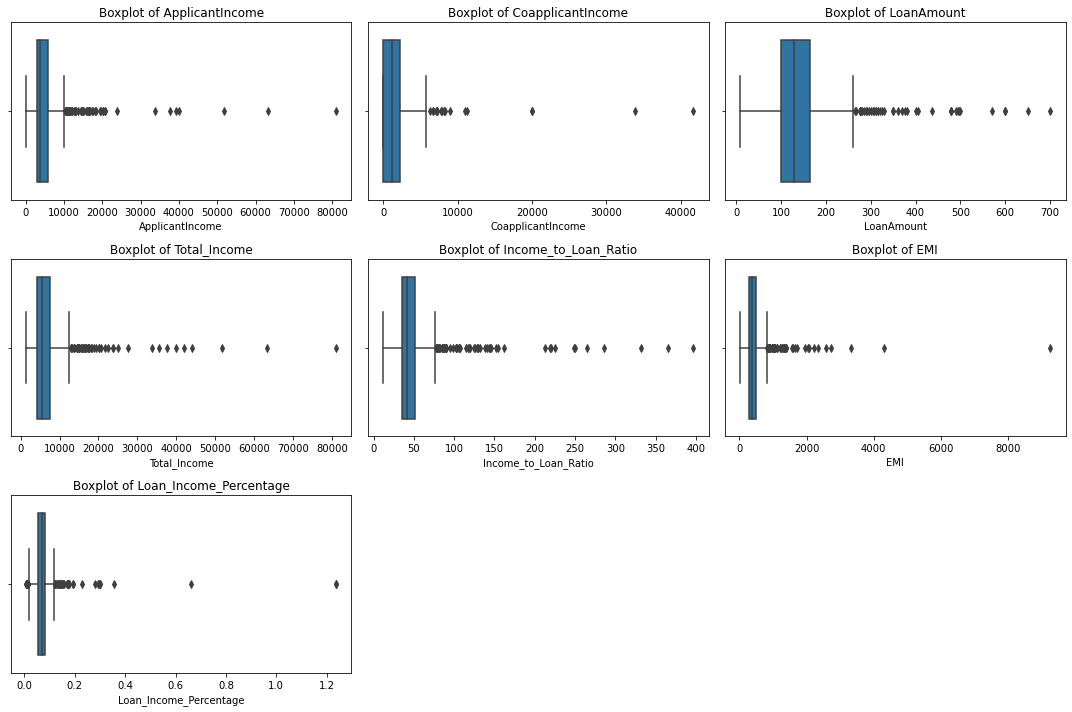

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing outliers using boxplots
numerical_cols = [
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
    'Total_Income', 'Income_to_Loan_Ratio', 'EMI', 'Loan_Income_Percentage'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=loan_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Capping outliers
def cap_outliers(df, column):
    lower_percentile = df[column].quantile(0.05)
    upper_percentile = df[column].quantile(0.95)
    df[column] = df[column].clip(lower=lower_percentile, upper=upper_percentile)

# Apply to numerical columns
for col in numerical_cols:
    cap_outliers(loan_data, col)
    

## Step 5: Data Normalization

In [18]:
# Initialize the scaler
scaler = MinMaxScaler()

# Apply Min-Max scaling
loan_data[numerical_cols] = scaler.fit_transform(loan_data[numerical_cols])

loan_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Income_to_Loan_Ratio,EMI,Loan_Income_Percentage
0,1,0,0,0,0.311495,0.000000,0.299449,360.0,1.0,1,0,0,0,0,1,0.228096,0.225241,0.214205,0.298749
1,1,1,0,0,0.211695,0.301757,0.299449,360.0,1.0,0,1,0,0,0,0,0.246203,0.249509,0.214205,0.274190
2,1,1,0,1,0.086907,0.000000,0.036849,360.0,1.0,1,0,0,0,0,1,0.014927,0.222150,0.014044,0.302023
3,1,1,1,0,0.054034,0.471845,0.265565,360.0,1.0,1,0,0,0,0,1,0.160157,0.167219,0.188378,0.366612
4,1,0,0,0,0.323398,0.000000,0.354511,360.0,1.0,1,0,0,0,0,1,0.239394,0.184909,0.256174,0.344393


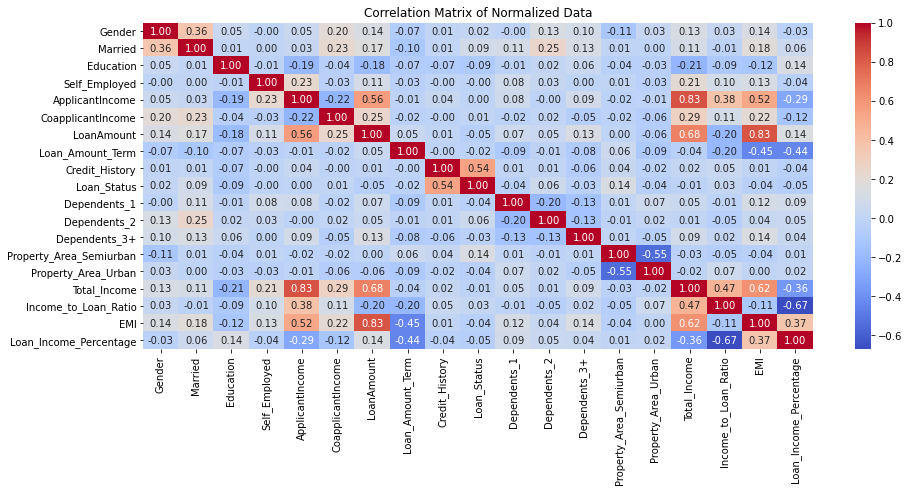

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.heatmap(loan_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Normalized Data")
plt.show()